In [64]:
import cv2
import time
import numpy as np

protoFile = "hand/pose_deploy.prototxt"
weightsFile = "hand/pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
nPoints2 = 12
POSE_PAIRS2 = [ [1,2],[2,3],[3,4],[5,8],[9,12],[13,16],[17,20] ]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [59]:
img = cv2.imread("./ra2.jpg")
frame = cv2.resize(frame,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)


In [80]:
frame = cv2.imread("./ra4.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight
threshold = 0.08

t = time.time()
# input image dimensions for the network
inHeight = 368
# inWidth = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
print("time taken by network : {:.3f}".format(time.time() - t))

time taken by network : 4.621


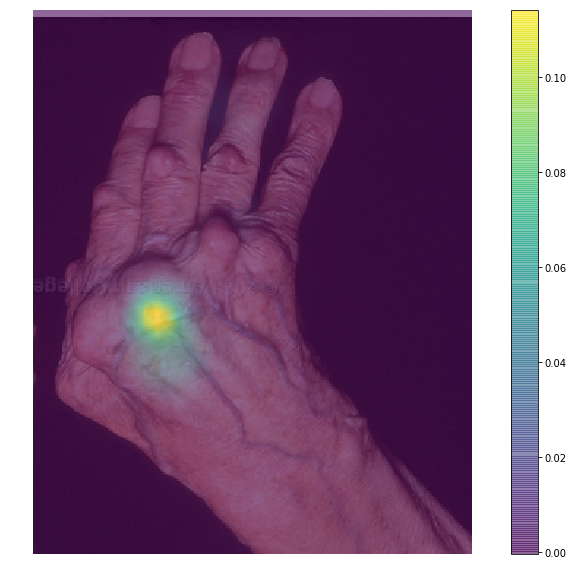

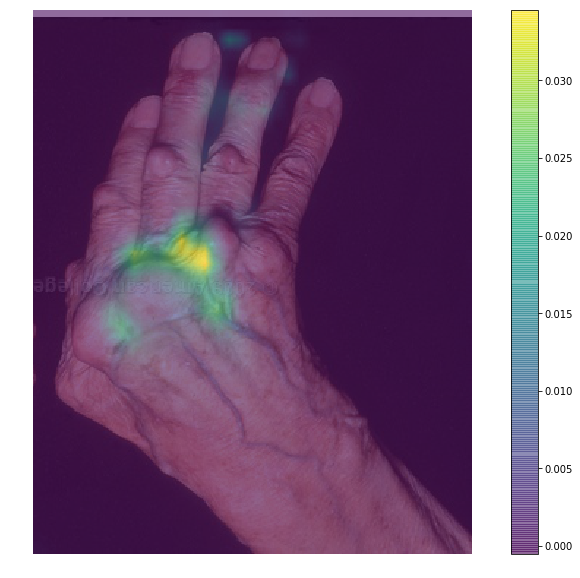

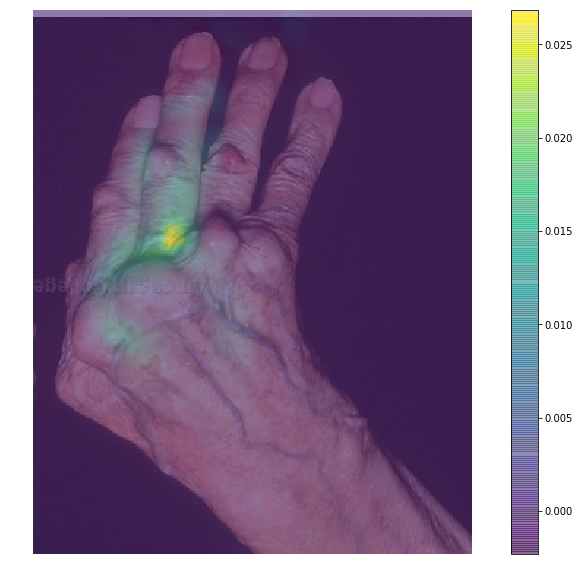

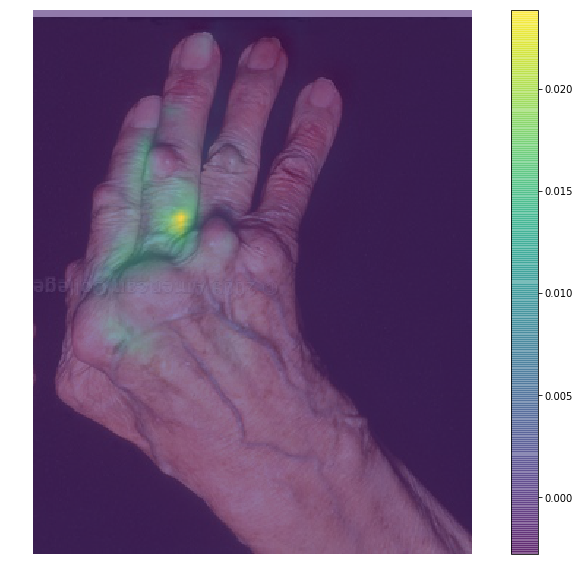

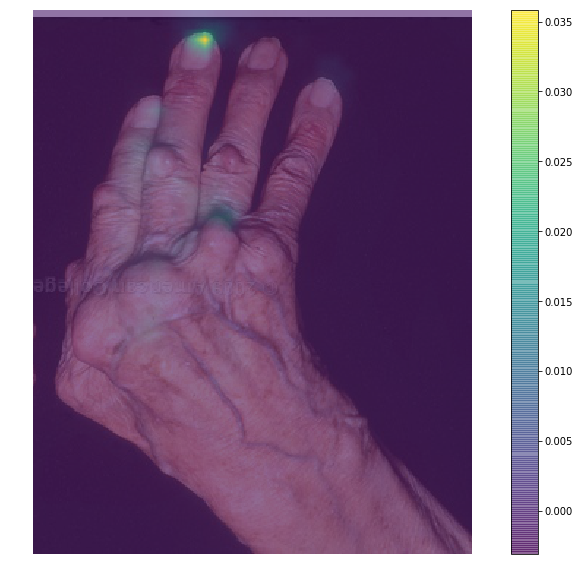

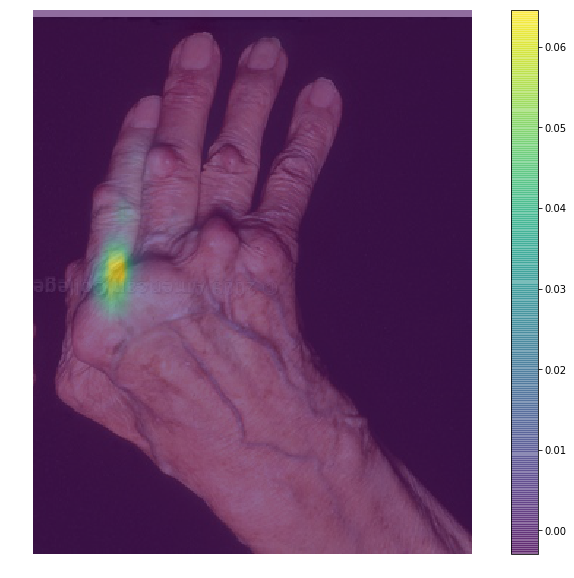

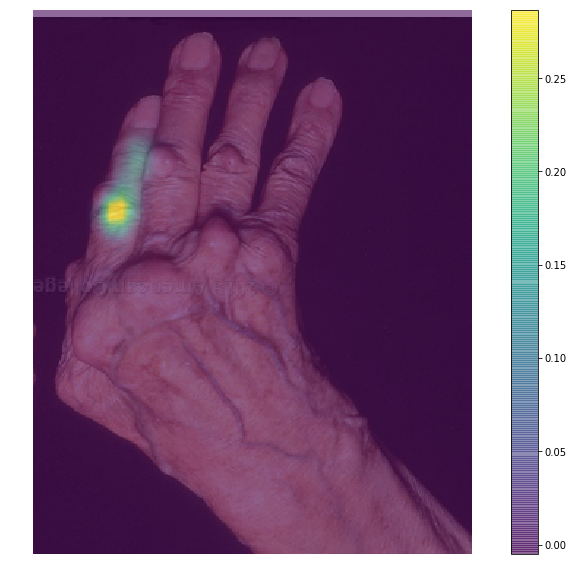

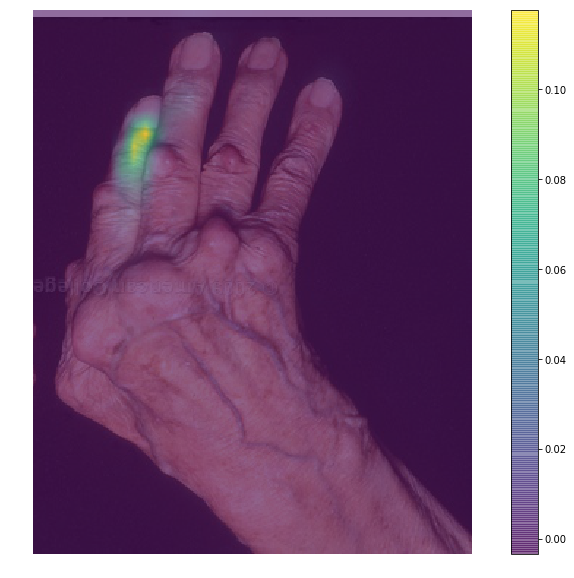

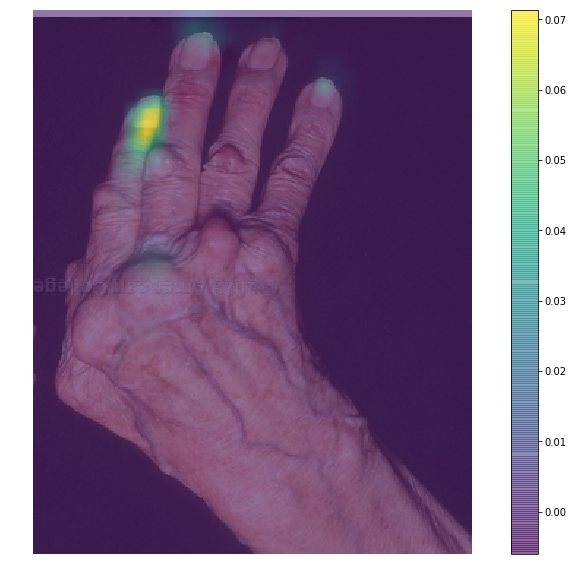

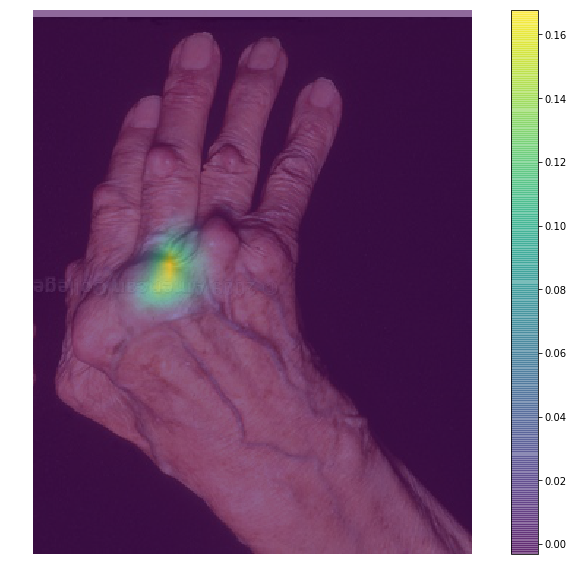

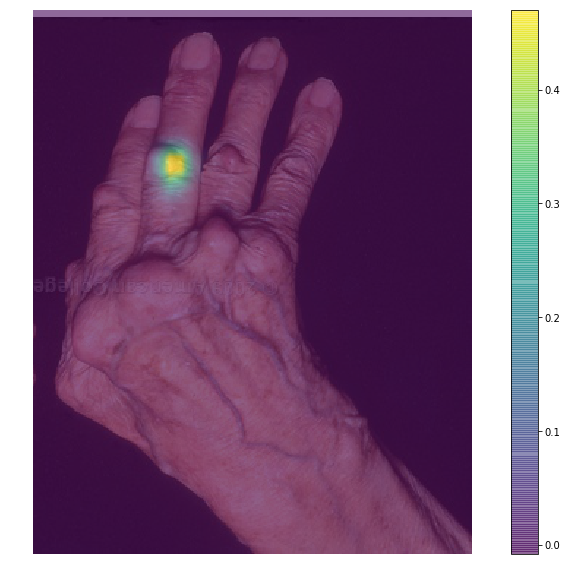

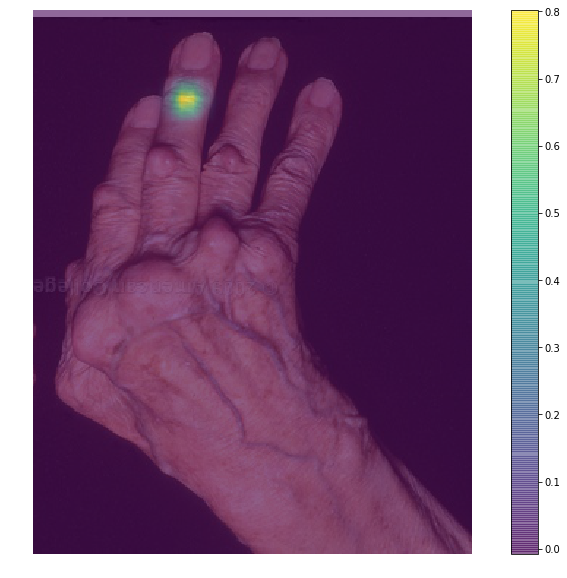

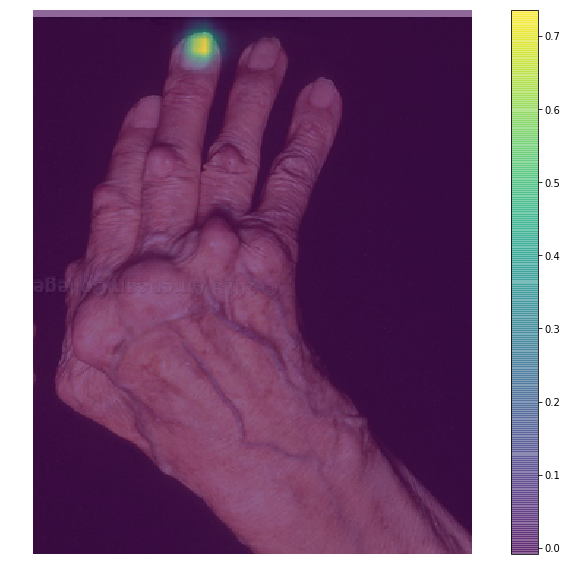

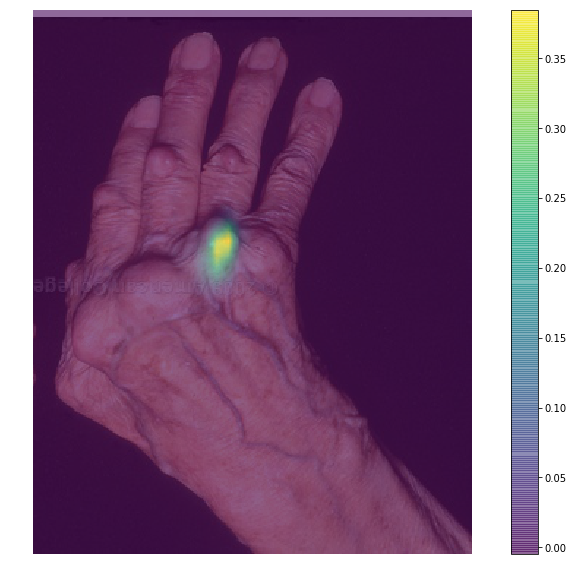

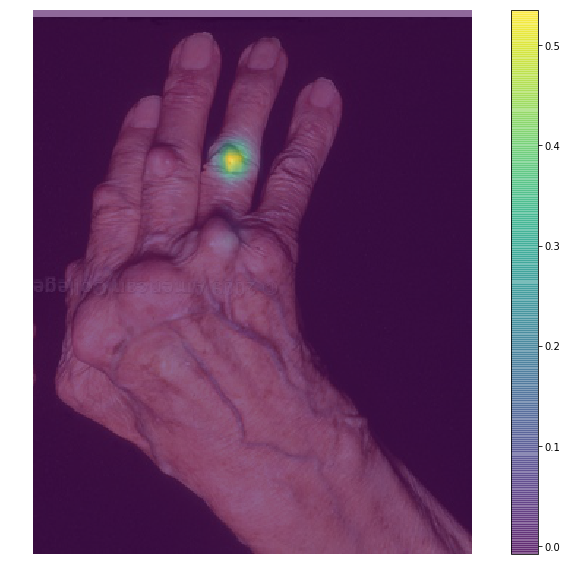

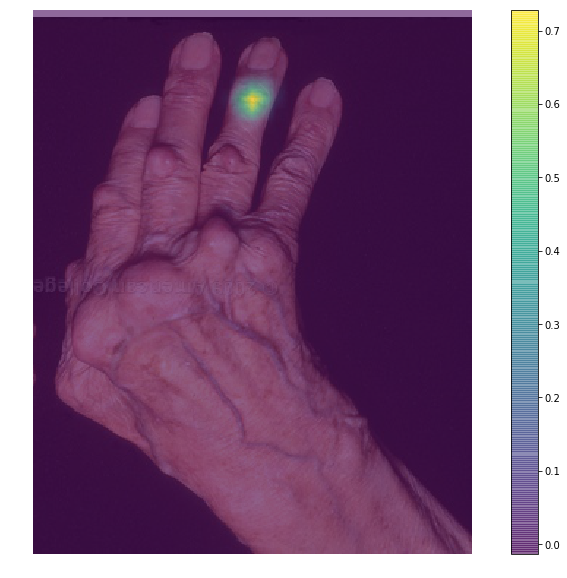

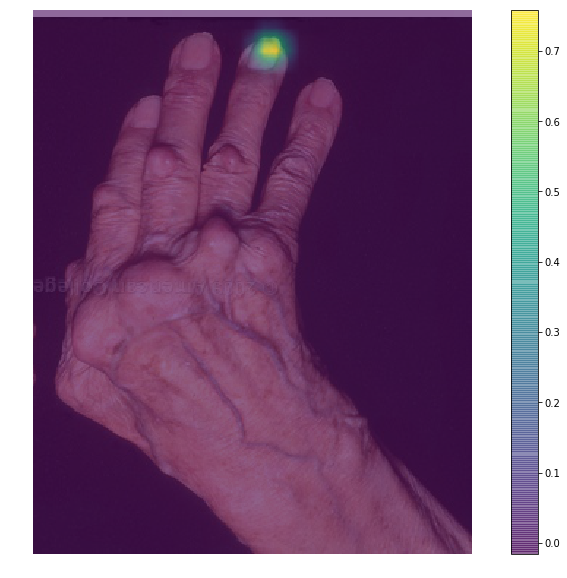

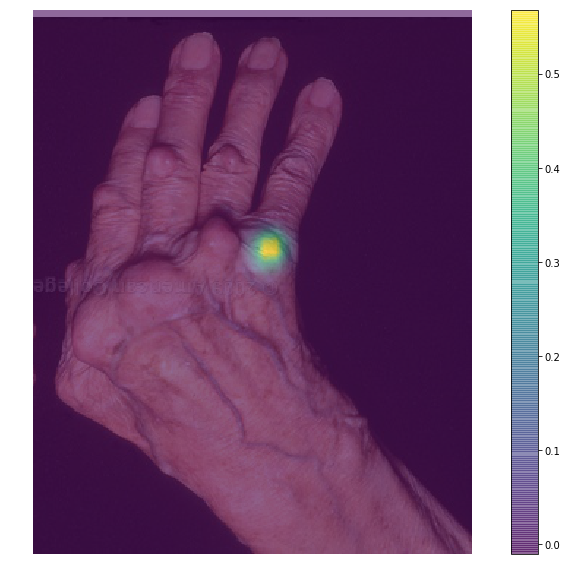

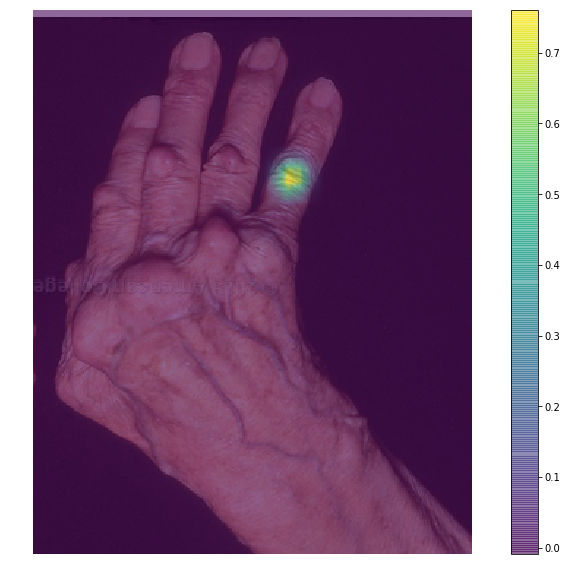

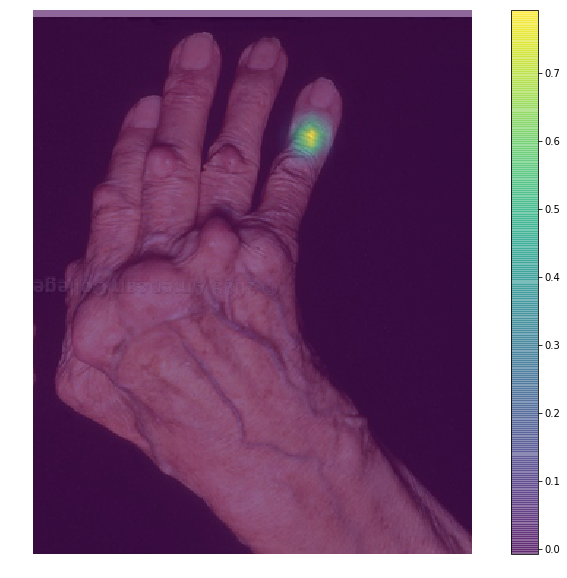

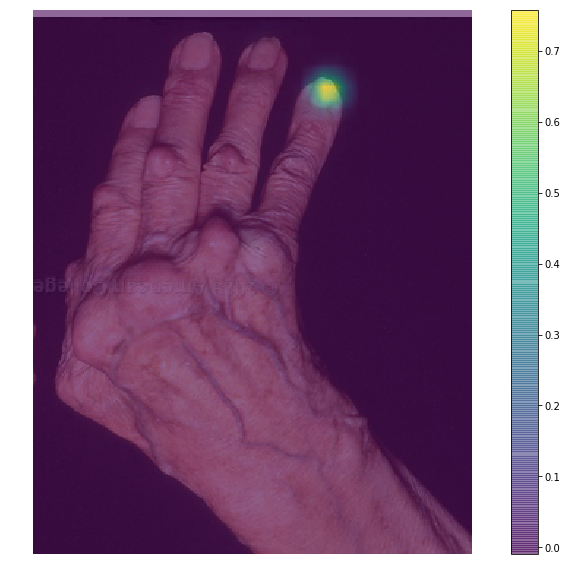

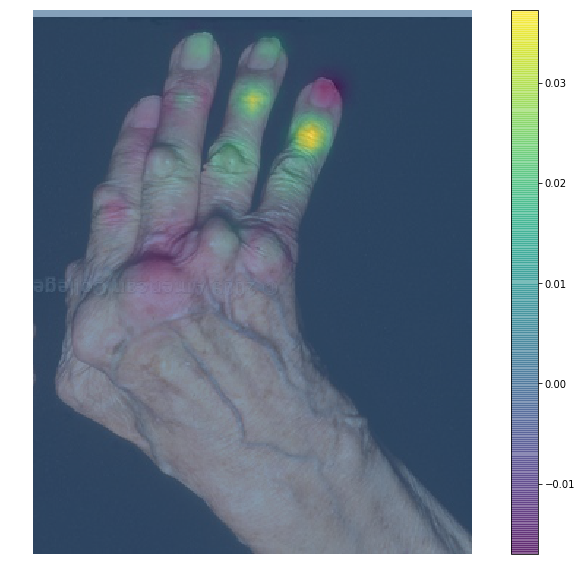

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(22):
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frame.shape[1], frame.shape[0]))
    plt.figure(figsize=[14,10])
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.imshow(probMap, alpha=0.6)
    plt.colorbar()
    plt.axis("off")

part A  (60, 133)  part B  (76, 84)
part A  6  part B  7
part A  (85, 213)  part B  (93, 174)
part A  0  part B  9
part A  (93, 174)  part B  (93, 108)
part A  9  part B  10
part A  (93, 108)  part B  (101, 60)
part A  10  part B  11
part A  (101, 60)  part B  (117, 27)
part A  11  part B  12
part A  (85, 213)  part B  (133, 157)
part A  0  part B  13
part A  (133, 157)  part B  (134, 101)
part A  13  part B  14
part A  (134, 101)  part B  (150, 60)
part A  14  part B  15
part A  (150, 60)  part B  (165, 28)
part A  15  part B  16
part A  (85, 213)  part B  (158, 165)
part A  0  part B  17
part A  (158, 165)  part B  (174, 117)
part A  17  part B  18
part A  (174, 117)  part B  (190, 85)
part A  18  part B  19
part A  (190, 85)  part B  (199, 52)
part A  19  part B  20
Total time taken : 6.872


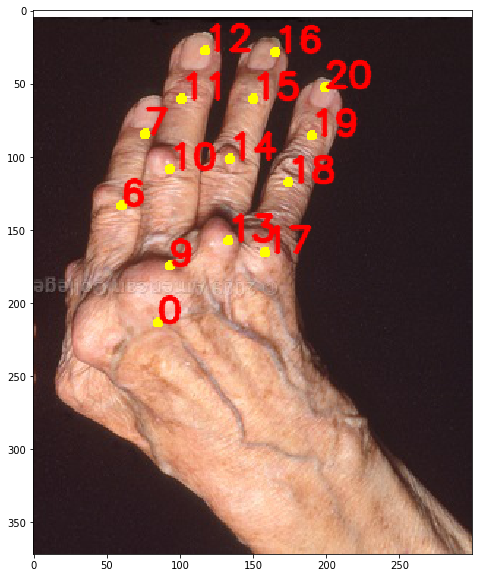

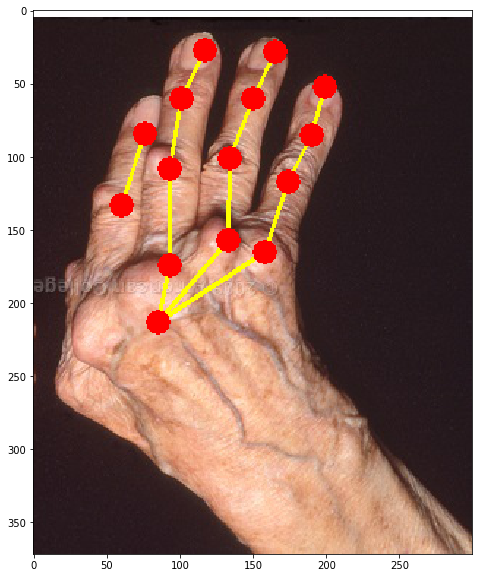

In [81]:
# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        print('part A ', points[partA] , ' part B ' ,points[partB])
        print('part A ', partA , ' part B ' ,partB)
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)


plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


cv2.imwrite('Output-Keypoints.jpg', frameCopy)
cv2.imwrite('Output-Skeleton.jpg', frame)

print("Total time taken : {:.3f}".format(time.time() - t))

part A  (93, 174)  part B  (117, 27)
part A  9  part B  12
part A  (133, 157)  part B  (165, 28)
part A  13  part B  16
part A  (158, 165)  part B  (199, 52)
part A  17  part B  20
distance  43.46262762420146
Total time taken : 26.084


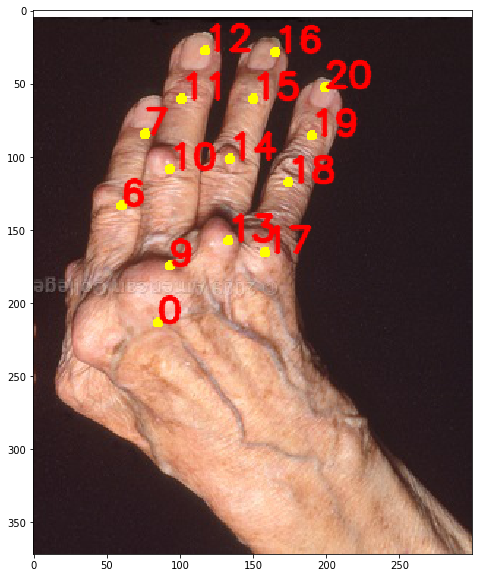

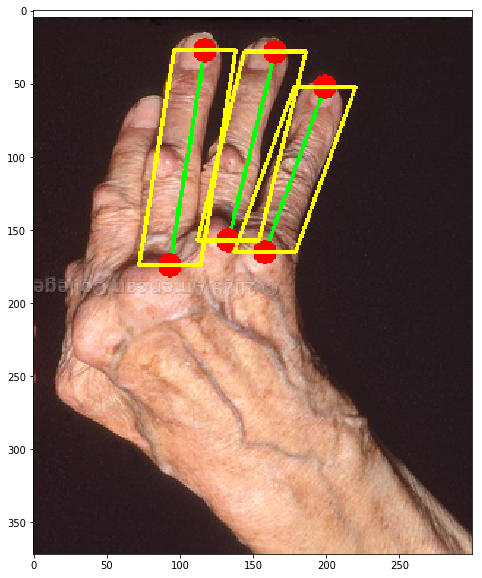

In [79]:
# Empty list to store the detected keypoints
points = []
knuckels= []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS2:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        print('part A ', points[partA] , ' part B ' ,points[partB])
        print('part A ', partA , ' part B ' ,partB)
        knuckels.append(points[partA])
        cv2.line(frame, points[partA], points[partB], (0, 255, 0), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.circle(frame, points[partB], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        
distance = np.sqrt(np.square(knuckels[1][0] - knuckels[0][0]) + np.square(knuckels[1][1] - knuckels[0][1]))
print('distance ',distance)

for pair in POSE_PAIRS2:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        #cv2.rectangle(frame, (int(points[partB][0]-distance/2),points[partB][1]), (int(points[partA][0]+distance/2),points[partA][1]), (0, 255, 0), 2)
        #print(points[partA][0]-distance/2 , points[partA][1])
        #print(points[partB][0]+distance/2 , points[partB][1])
        cv2.line(frame, (points[partA][0] - int(distance/2),points[partA][1]), (points[partB][0] - int(distance/2),points[partB][1]), (0, 255, 255), 2)
        cv2.line(frame, (points[partB][0] - int(distance/2),points[partB][1]), (points[partB][0] + int(distance/2),points[partB][1]), (0, 255, 255), 2)
        cv2.line(frame, (points[partB][0] + int(distance/2),points[partB][1]), (points[partA][0] + int(distance/2),points[partA][1]), (0, 255, 255), 2)
        cv2.line(frame, (points[partA][0] + int(distance/2),points[partA][1]), (points[partA][0] - int(distance/2),points[partA][1]), (0, 255, 255), 2)
        

        
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


cv2.imwrite('Output-Keypoints.jpg', frameCopy)
cv2.imwrite('Output-Skeleton.jpg', frame)

print("Total time taken : {:.3f}".format(time.time() - t))